In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import array
from scipy import spatial
# my_array = np.genfromtxt('data.txt', skip_header=1, delimiter=',')
# my_array = np.array (my_array)
# print (my_array)
# new_my_array=np.delete(my_array, 2, axis=1)
# X = np.delete(new_my_array,1,axis=1)
# y = np.delete(new_my_array,0,axis=1)
# print (new_my_array)
# print(X)
# print (y)

#membaca file, mendefine majority dan minority berdasarkan valuenya
data = pd.read_csv('data.csv')
majority = data.loc[data['class']==0]
minority = data.loc[data['class']==1]

#menghapus kolom class
majority_points=majority.drop('class', axis=1)
minority_points=minority.drop('class', axis=1)

all_data = pd.concat([majority,minority])

data_points = all_data.drop('class', axis=1)
# print(data_points)

majority_points=np.array(majority_points)
print (majority_points)
minority_points =np.array(minority_points)
print (minority_points)
# minority_points[spatial.KDTree(minority_points).query(majority_points)[1]]

[[1 1]
 [1 2]
 [1 3]
 [1 4]
 [1 5]
 [2 1]
 [2 2]
 [2 4]
 [2 5]
 [3 1]
 [3 2]
 [3 5]
 [4 1]
 [4 4]
 [4 5]
 [5 1]
 [5 2]
 [5 3]
 [5 4]
 [5 5]]
[[2 3]
 [3 3]
 [3 4]
 [4 2]
 [4 3]]


In [2]:
data.groupby('class').size()

class
0    20
1     5
dtype: int64

In [3]:
#menghitung nearest neighbor titik minority terhadap majority berdasarkan euclidean distance
from scipy.spatial import distance
Y = distance.cdist(minority_points, majority_points, 'euclidean')

#mengurutkan hasil secara ascending
K = np.argsort(Y)
# print (Y)
# print ("Urutan data: \n", K)
Y.sort()
# print ("After short: \n", Y)
Y.shape

(5, 20)

In [4]:
print (K[:5,:4])

[[ 2  6  7  1]
 [10  6  7 13]
 [ 7 11 13  8]
 [16 10 12  9]
 [17 13 16 10]]


In [5]:
#mengambil 3 terdekat
new_K = K[:5,:3]

In [6]:
print (new_K.shape)

(5, 3)


In [7]:
new_K

array([[ 2,  6,  7],
       [10,  6,  7],
       [ 7, 11, 13],
       [16, 10, 12],
       [17, 13, 16]], dtype=int64)

In [8]:
new_K.all()

True

In [9]:
minority_points[0]

array([2, 3], dtype=int64)

In [10]:
#mengembalikan value titik 3 nearest neighbor terdekat
array_new=np.array(majority_points[K[:,0:3]])

In [11]:
print(array_new)

[[[1 3]
  [2 2]
  [2 4]]

 [[3 2]
  [2 2]
  [2 4]]

 [[2 4]
  [3 5]
  [4 4]]

 [[5 2]
  [3 2]
  [4 1]]

 [[5 3]
  [4 4]
  [5 2]]]


In [12]:
array_new.shape

(5, 3, 2)

In [13]:
#mengubah bentuknya menjadi 2 dimensi
XX= array_new.transpose(0,1,2).reshape(15,2)

In [14]:
XX.shape

(15, 2)

In [15]:
#menambahkan 1 kolom baru berisi nilai 0
zeros_value = np.zeros((15,1))

In [16]:
new_X = np.concatenate ((XX, zeros_value), axis=1)

In [17]:
print(new_X)

[[1. 3. 0.]
 [2. 2. 0.]
 [2. 4. 0.]
 [3. 2. 0.]
 [2. 2. 0.]
 [2. 4. 0.]
 [2. 4. 0.]
 [3. 5. 0.]
 [4. 4. 0.]
 [5. 2. 0.]
 [3. 2. 0.]
 [4. 1. 0.]
 [5. 3. 0.]
 [4. 4. 0.]
 [5. 2. 0.]]


In [18]:
new_X.shape

(15, 3)

In [19]:
#mengambil nilai yang unik/hanya muncul sekali
new_X_unique = np.unique(new_X,axis=0)

In [20]:
new_X_unique
new_X_unique.shape
#mengubah ke bentuk float
new_X_unique.astype(float)

array([[1., 3., 0.],
       [2., 2., 0.],
       [2., 4., 0.],
       [3., 2., 0.],
       [3., 5., 0.],
       [4., 1., 0.],
       [4., 4., 0.],
       [5., 2., 0.],
       [5., 3., 0.]])

In [21]:
array_minority = np.array(minority)

In [22]:
array_minority

array([[2, 3, 1],
       [3, 3, 1],
       [3, 4, 1],
       [4, 2, 1],
       [4, 3, 1]], dtype=int64)

In [23]:
array_minority.astype(float)

array([[2., 3., 1.],
       [3., 3., 1.],
       [3., 4., 1.],
       [4., 2., 1.],
       [4., 3., 1.]])

In [24]:
#menggabungkan data majority dan minority
joined_resampling = np.concatenate((array_minority,new_X_unique), axis=0)

In [25]:
joined_resampling.shape

(14, 3)

In [26]:
#mengambil 2 kolom feature untuk ditrain
X = joined_resampling[:,0:2]
print (X)
X.shape

[[2. 3.]
 [3. 3.]
 [3. 4.]
 [4. 2.]
 [4. 3.]
 [1. 3.]
 [2. 2.]
 [2. 4.]
 [3. 2.]
 [3. 5.]
 [4. 1.]
 [4. 4.]
 [5. 2.]
 [5. 3.]]


(14, 2)

In [27]:
y = joined_resampling[:,2]
print (y)
y.shape

[1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


(14,)

In [28]:
from collections import Counter

print ('Setelah undersampling, komponen data: {}' .format(Counter(y)))

Setelah undersampling, komponen data: Counter({0.0: 9, 1.0: 5})


In [40]:
from sklearn.svm import SVC

svm = SVC(gamma=2, kernel='rbf', C=1)
svm.fit(X,y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [30]:
def plot_decision_function(X, y, clf, ax):
    plot_step = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], alpha=0.8, c=y, edgecolor='k')

float64


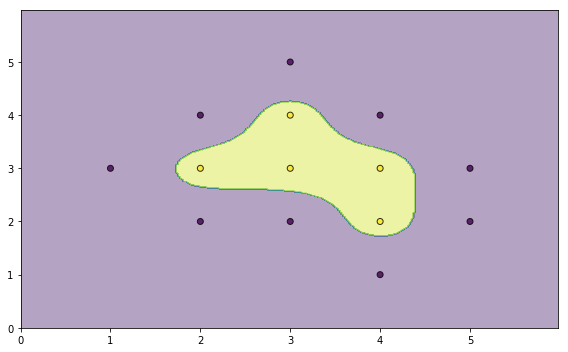

In [41]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

fig, ax = plt.subplots(1,figsize=(8,5))

classifier = svm.fit(X,y)
print (y.dtype)
plot_decision_function(X,y,classifier,ax)
fig.tight_layout()

In [32]:
from sklearn.metrics import classification_report

prediction = svm.predict(X)

print (classification_report(y,prediction))

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         9
         1.0       1.00      0.40      0.57         5

   micro avg       0.79      0.79      0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14



In [33]:
print (data)

    x  y  class
0   1  1      0
1   1  2      0
2   1  3      0
3   1  4      0
4   1  5      0
5   2  1      0
6   2  2      0
7   2  3      1
8   2  4      0
9   2  5      0
10  3  1      0
11  3  2      0
12  3  3      1
13  3  4      1
14  3  5      0
15  4  1      0
16  4  2      1
17  4  3      1
18  4  4      0
19  4  5      0
20  5  1      0
21  5  2      0
22  5  3      0
23  5  4      0
24  5  5      0
